## XGBoost

In [76]:
import xgboost as xgb

In [ ]:
data = pd.read_csv('./data.csv')

data_x = data.iloc[:,:-1]
data_y = data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# 데이터 표준화
standardized_data_x = scaler.fit_transform(data_x)
data_s_x = pd.DataFrame(standardized_data_x, columns = data_x.columns)

X_train, X_test, y_train, y_test = train_test_split(data_s_x, data_y, test_size=0.2, random_state=0)

In [123]:
# XGBoost 분류기 설정
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 하이퍼파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 4, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss']
}

# GridSearchCV 객체 생성
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# 그리드 서치 실행
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 최고 점수 출력
print("Best parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\yy950\anaconda3\envs\py38\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters: {'colsample_bytree': 0.9, 'eval_metric': 'logloss', 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'objective': 'binary:logistic', 'subsample': 1.0}
Best Accuracy: 0.9086092715231787


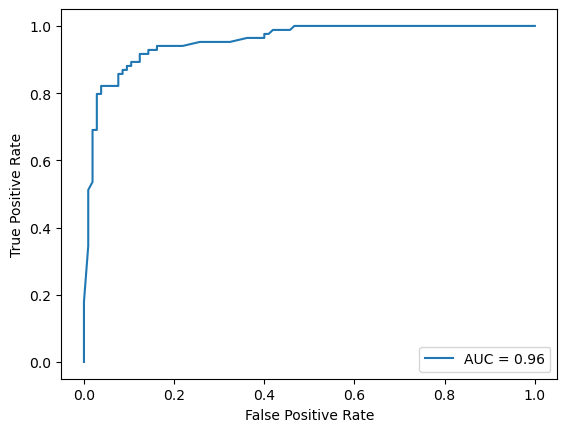

Accuracy: 0.89
F1 Score: 0.887067861715749
AUC: 0.9555555555555556
Confusion Matrix:
 [[96  9]
 [12 72]]


In [27]:
# DMatrix 생성: XGBoost 전용 데이터 구조
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 파라미터 설정
params = {
    'max_depth': 3,
    'colsample_bytree': 0.9,
    'learning_rate': 0.01,
    'subsample': 1.0,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# 훈련: num_boost_round는 부스팅 라운드 횟수
model = xgb.train(params, dtrain, num_boost_round=200)
y_probs = model.predict(dtest)
y_pred = (y_probs > 0.5).astype(int)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)

#혼동 행렬
conf_matrix = confusion_matrix(y_test, y_pred)

#F1 score
f1 = f1_score(y_test, y_pred, average='macro')

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc).plot()
plt.show()
print(f"Accuracy: {accuracy:.2f}")
print("F1 Score:", f1)
print("AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

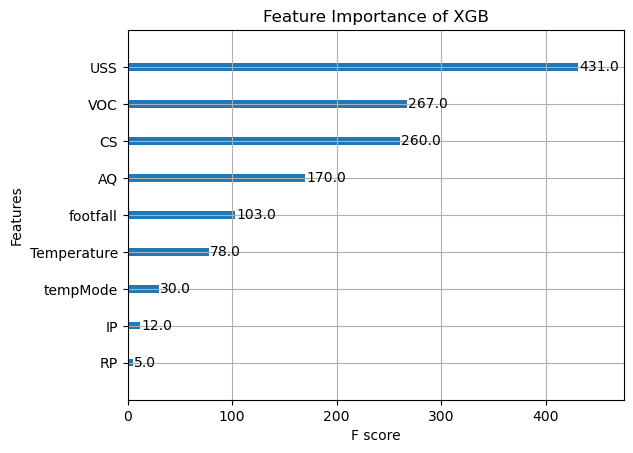

In [26]:
xgb.plot_importance(model)
plt.title('Feature Importance of XGB')
plt.show()